Loading Few HR,LR images from Local System

contains 10 Low Resolution and 10 High Resolution Images

In [1]:
!unzip "DataSet"

Archive:  DataSet.zip
   creating: DataSet/
  inflating: DataSet/high0.jpeg      
  inflating: DataSet/high1.jpeg      
  inflating: DataSet/high2.jpeg      
  inflating: DataSet/high3.jpeg      
  inflating: DataSet/high4.jpeg      
  inflating: DataSet/high5.jpeg      
  inflating: DataSet/high6.jpeg      
  inflating: DataSet/high7.jpeg      
  inflating: DataSet/high8.jpeg      
  inflating: DataSet/high9.jpeg      
  inflating: DataSet/low0.jpeg       
  inflating: DataSet/low1.jpeg       
  inflating: DataSet/low2.jpeg       
  inflating: DataSet/low3.jpeg       
  inflating: DataSet/low4.jpeg       
  inflating: DataSet/low5.jpeg       
  inflating: DataSet/low6.jpeg       
  inflating: DataSet/low7.jpeg       
  inflating: DataSet/low8.jpeg       
  inflating: DataSet/low9.jpeg       


Display Image

In [2]:
%cd /content/DataSet/

/content/DataSet


In [0]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np 
import matplotlib.pyplot as plt

In [0]:
lowR = cv2.imread("low0.jpeg")
highR = cv2.imread("high0.jpeg")

In [5]:
type(lowR),type(highR)

(numpy.ndarray, numpy.ndarray)

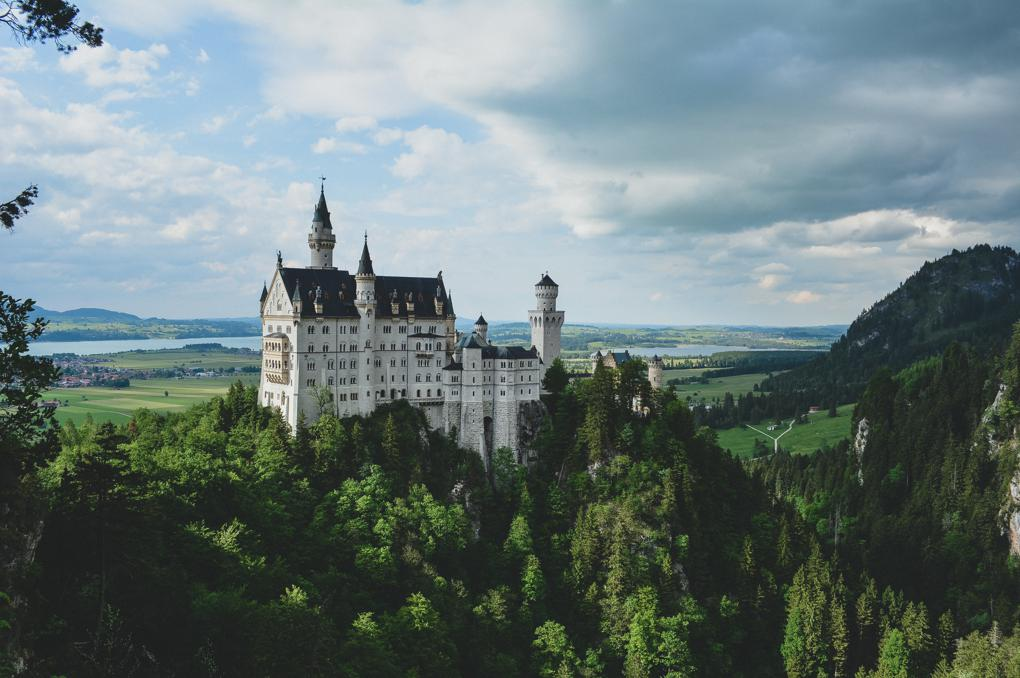

In [6]:
cv2_imshow(lowR)

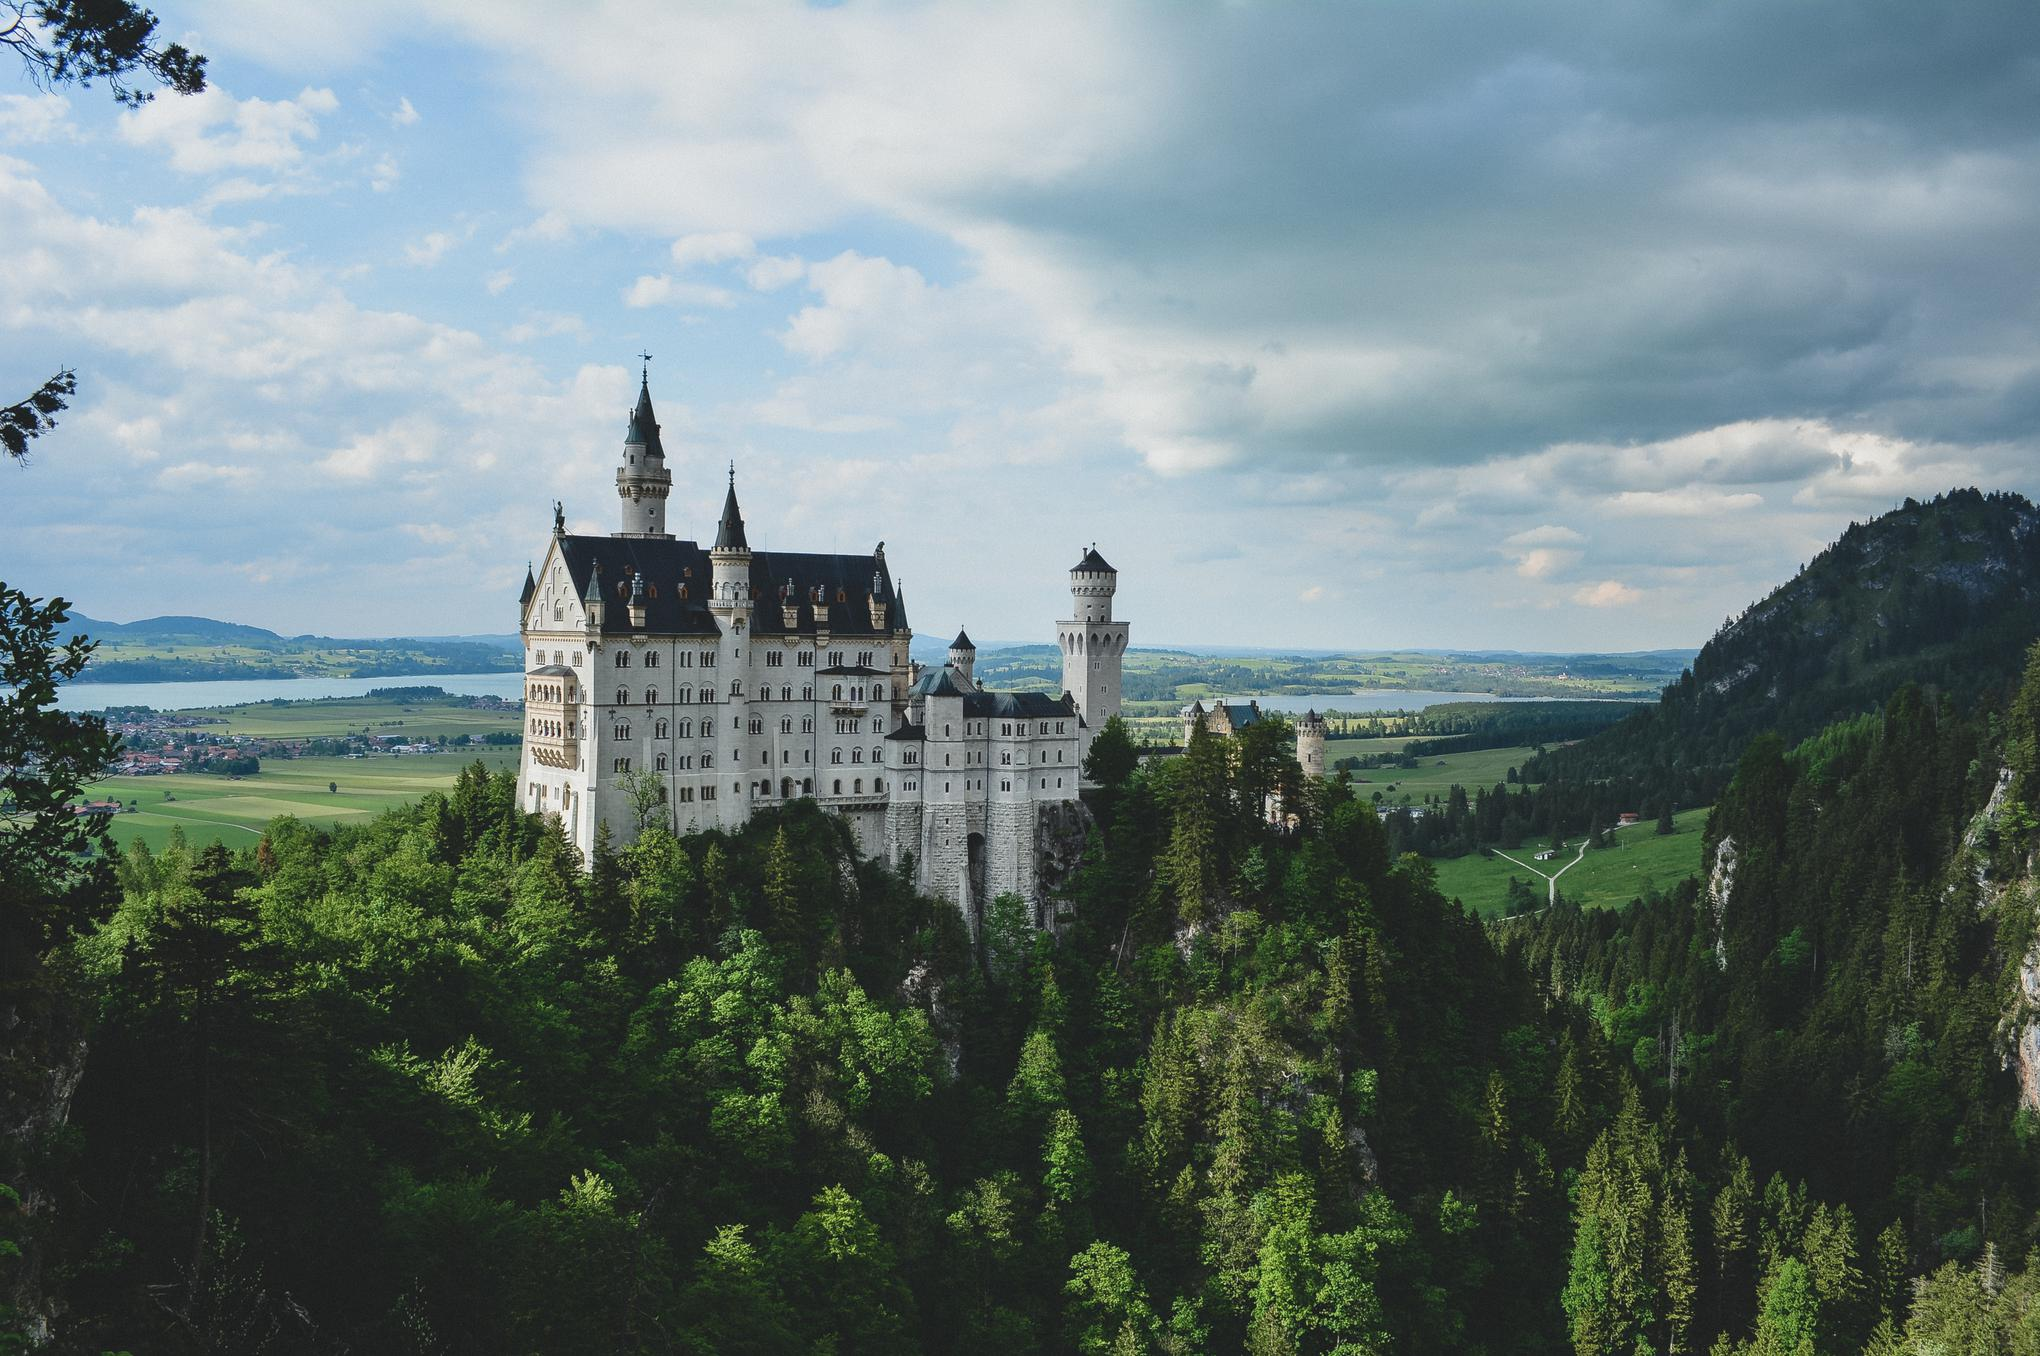

In [7]:
cv2_imshow(highR)

Shapes of the images

In [8]:
lowR.shape,highR.shape

((678, 1020, 3), (1356, 2040, 3))

# Generating 64 DCT Basis

Running DCT
n: 8
Generating DCT basis images
Saving figure...


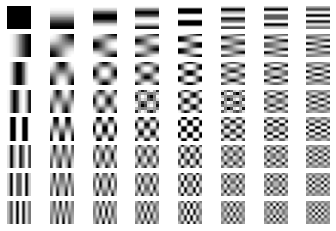

Complete


In [9]:
from math import cos,sqrt,pi
import sys
import pylab as p_
import matplotlib.cm as cm

def dct(x, y, u, v, n):
    # Normalisation
    def alpha(a):
        if a==0:
            return sqrt(1.0/n)
        else:
            return sqrt(2.0/n)
    return alpha(u) * alpha(v) * cos(((2*x+1)*(u*pi))/(2*n)) * cos(((2*y+1)*(v*pi))/(2*n))

def getBasisImage(u, v, n):
    # for a given (u,v), make a DCT basis image
    basisImg = np.zeros((n,n))
    for y in range(0, n):
        for x in range(0, n):
            basisImg[y,x] = dct(x, y, u, v, n)
    return basisImg

if __name__ == '__main__':
    print("Running DCT")

    # n (int): assume square image, so we don't have different xres and yres
    try:
        n = int(sys.argv[1])
    except:
        n = 8
    print("n: %d" % n)

    # We can get different frequencies by setting u and v
    print("Generating DCT basis images")
    imageSet = []
    for u in range(0, n):
        for v in range(0, n):
            basisImg = getBasisImage(u, v, n)
            imageSet.append(basisImg)

    print("Saving figure...")
    p_.figure("DCT")
    for i in range(0, len(imageSet)):
        p_.subplot(n, n, i+1)
        p_.axis('off')
        p_.imshow(imageSet[i],cmap = cm.Greys_r)
    p_.savefig('_dct_'+str(n)+'x'+str(n)+'_'+str(n)+'x'+str(n)+'.png')
    p_.show()

    print("Complete" )

Displaying Few Basis 

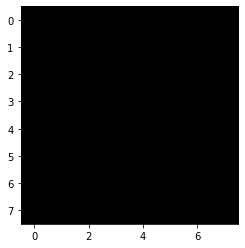

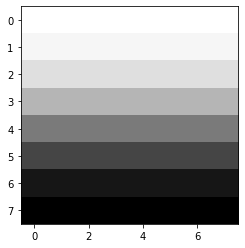

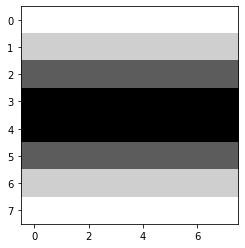

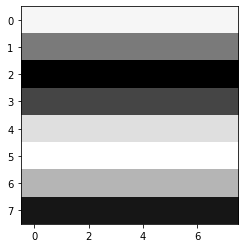

In [10]:
p_.figure("DCT")
for i in range(0, len(imageSet)):
    p_.imshow(imageSet[i],cmap = cm.Greys_r)
    p_.show()
    if i==3:
      break

In [0]:
helperList=[[None for i in range(8)] for j in range(8)]
c = 0
for i in range(8):
  for j in range(8):
    helperList[i][j] = imageSet[c]
    c+=1

**Creating a zig zag order list of basis** 

In [0]:
def isOutOfBounds(row,col,height,width):
    return row<0 or row>height or col<0 or col>width

height =  len(helperList)-1
width = len(helperList[0])-1
result = []
row = 0
col = 0
goingDown = True
while not isOutOfBounds(row,col,height,width):
    #print(A[row][col])
    result.append(helperList[row][col])
    if goingDown:
        if col==0 or row==height:
            goingDown = False
            if row==height:
                col+=1
            else:
                row+=1
        else:
            row+=1
            col-=1
    else:
        if row==0 or col==width:
            goingDown = True
            if col==width:
                row+=1
            else:
                col+=1
        else:
            row-=1
            col+=1

In [13]:
len(result)

64

# ZigZag Basis Created

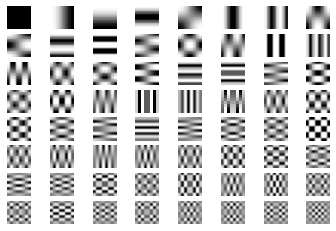

In [14]:
p_.figure("DCT")
for i in range(0, len(result)):
  p_.subplot(n, n, i+1)
  p_.axis('off')
  p_.imshow(result[i],cmap = cm.Greys_r)
p_.savefig('_dct_zigzag'+str(n)+'x'+str(n)+'_'+str(n)+'x'+str(n)+'.png')
p_.show()


# Handling HR and LR image

In [15]:
lowR.shape,highR.shape

((678, 1020, 3), (1356, 2040, 3))

In [0]:
img = highR.copy()

DownScaling the image 

In [17]:
scale_percent = 50 # percent of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)
# resize image
resized = cv2.resize(img, dim, interpolation = cv2.INTER_CUBIC)
print('Resized Dimensions : ',resized.shape) 
cv2.imwrite("DownScaledHRimage.jpeg", resized)
 

Resized Dimensions :  (678, 1020, 3)


True

Upscaling the image

In [18]:
print('Original Dimensions : ',resized.shape)
scale_percent = 200 # percent of original size
width = int(resized.shape[1] * scale_percent / 100)
height = int(resized.shape[0] * scale_percent / 100)
dim = (width, height)
# resize image
hrUPsample = cv2.resize(resized, dim, interpolation = cv2.INTER_CUBIC)
 
print('Resized Dimensions : ',hrUPsample.shape)
cv2.imwrite("UPScaledHRimage.jpeg", hrUPsample)

Original Dimensions :  (678, 1020, 3)
Resized Dimensions :  (1356, 2040, 3)


True


Summary of what we did :

Initially we had a HR image,  We created two image now HR and HR* , HR* is the image that we obtain by <br>

HR* = UPSample(DownSample(HR)) <br>

In code Name:<br>
HR = highR<br>
HR* = hrUpsample


In [19]:
highR.shape,hrUPsample.shape

((1356, 2040, 3), (1356, 2040, 3))

# Performing Convolution with Zig Zag Basis 

# With HR image 

In [0]:
gray = cv2.cvtColor(highR, cv2.COLOR_BGR2GRAY)

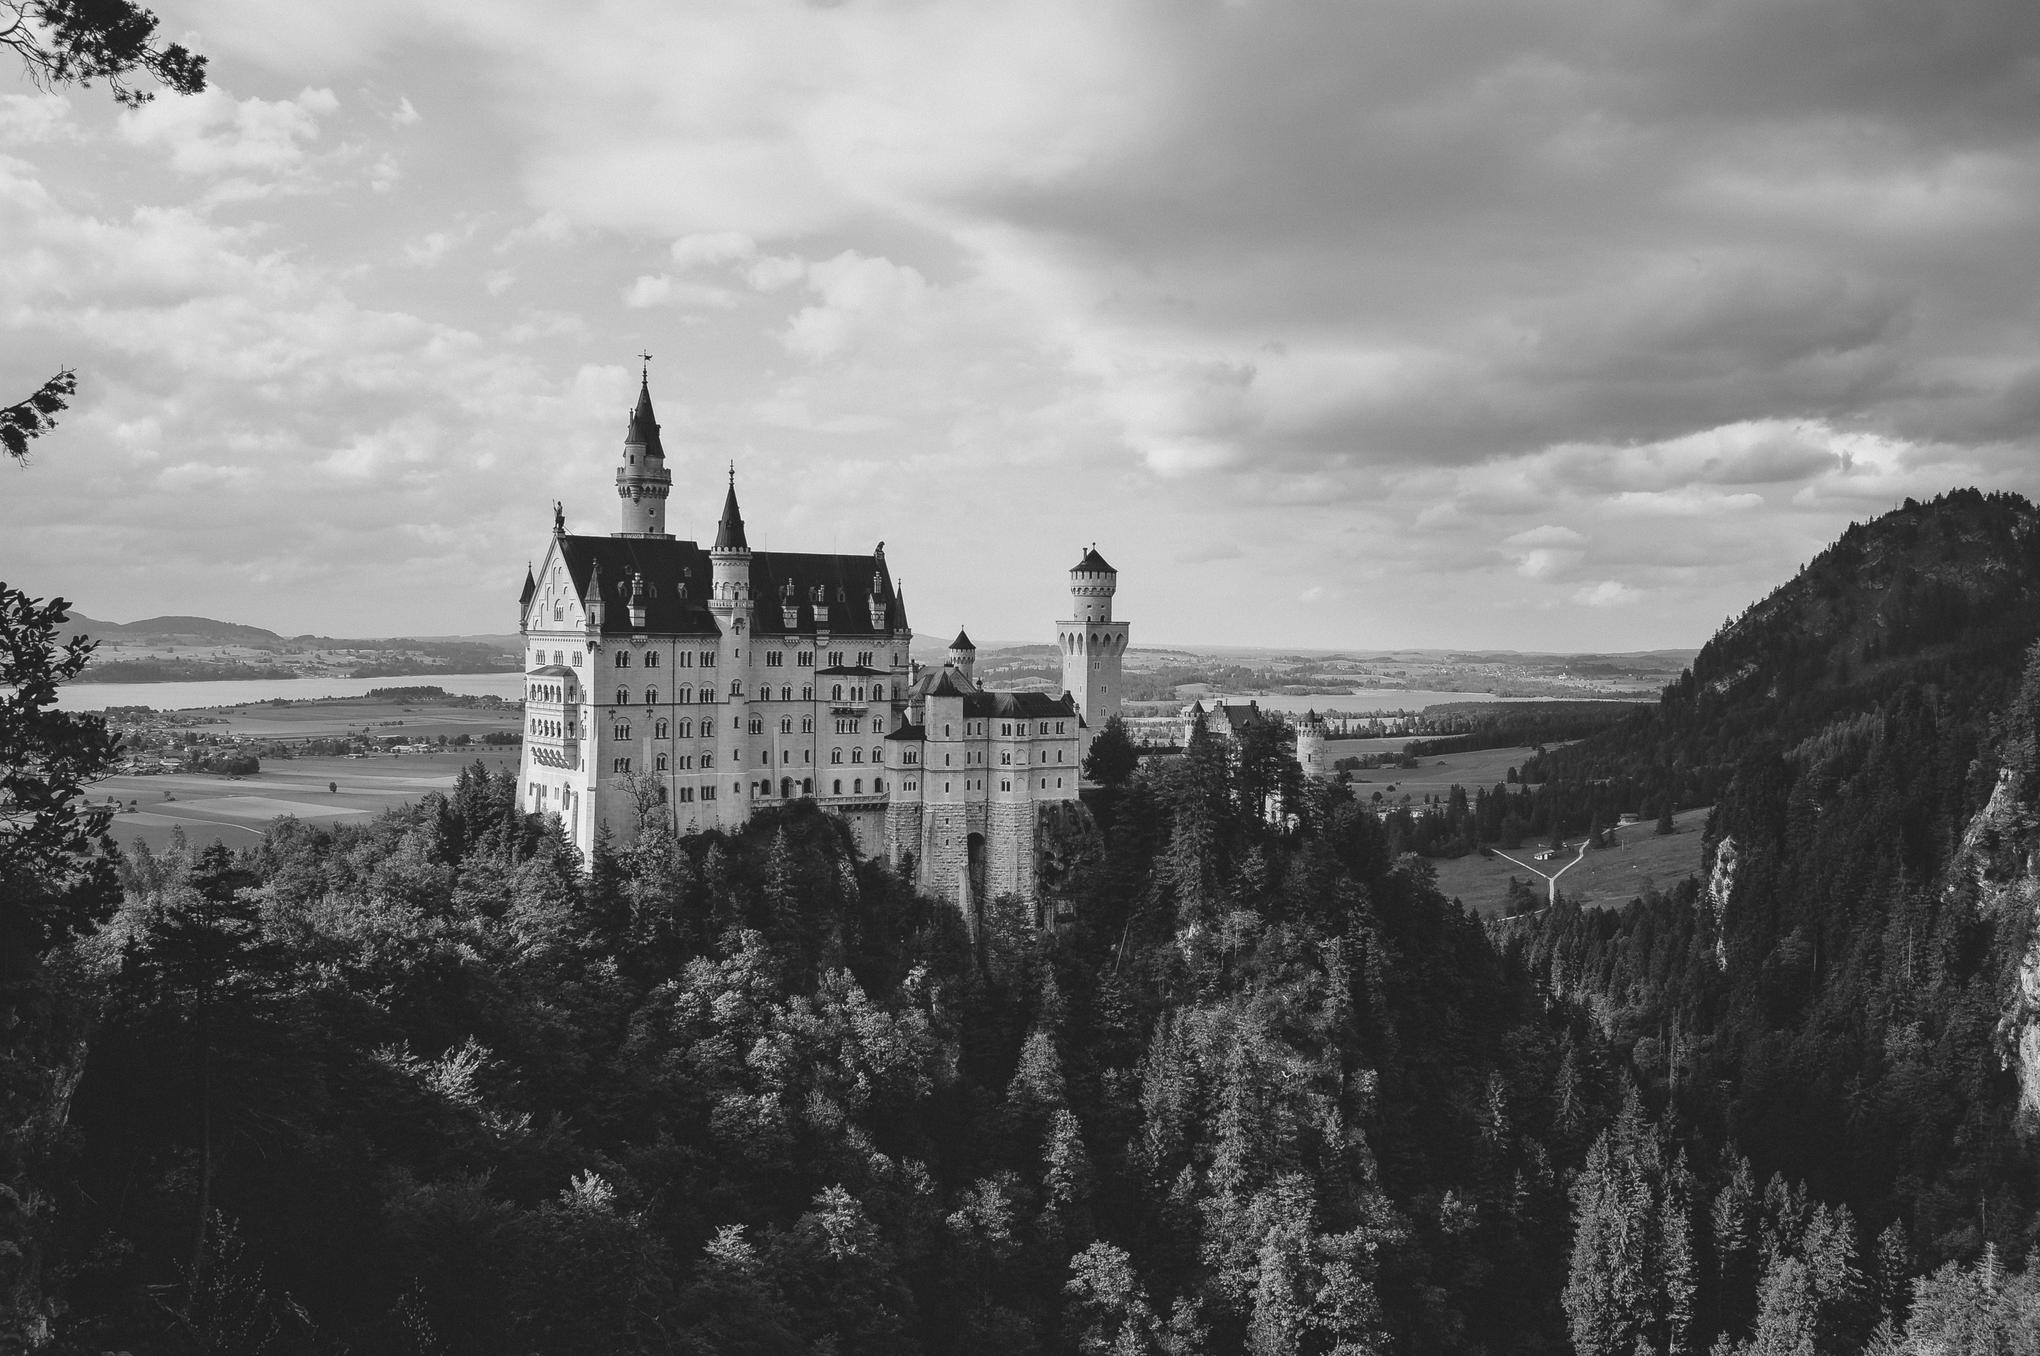

In [21]:
cv2_imshow(gray)

In [0]:
from scipy import ndimage
convoluted_img_array = []
convoluted_img_array_sum = []

In [0]:
def convo(img,kernel):
  cimg= ndimage.convolve(img, kernel, mode='constant', cval=0.0)
  convoluted_img_array.append(cimg)
  sm = np.sum(cimg)
  convoluted_img_array_sum.append(sm)

In [0]:
for i in range(64):
  kernel = result[i]
  convo(gray,kernel)

Now we have two arrays : <br>

1 - Array consisting all the convoluted image <br>
2 - Array consisting sum off such image <br>

# Histogram Plotting 

## WITH HR Image

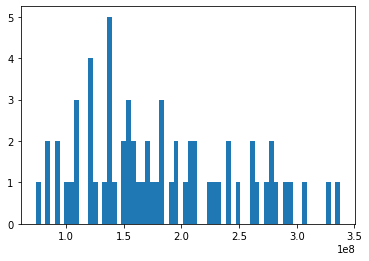

In [25]:
import matplotlib.pyplot as plt
convo_sum = np.array(convoluted_img_array_sum)
plt.hist(convo_sum, bins=64)
plt.show()

## WITH HR* IMAGE

In [0]:
hrUpsamplegray = cv2.cvtColor(hrUPsample, cv2.COLOR_BGR2GRAY)

In [0]:
convoluted_img_array_hr_up = []
convoluted_img_array_sum_hr_up = []

In [0]:
def convo(img,kernel):
  cimg= ndimage.convolve(img, kernel, mode='constant', cval=0.0)
  convoluted_img_array_hr_up.append(cimg)
  sm = np.sum(cimg)
  convoluted_img_array_sum_hr_up.append(sm)

In [0]:
for i in range(64):
  kernel = result[i]
  convo(hrUpsamplegray,kernel)

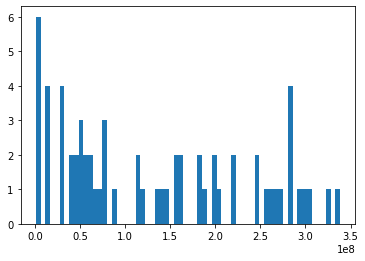

In [30]:
convo_sum_hr_up = np.array(convoluted_img_array_sum_hr_up)
plt.hist(convo_sum_hr_up, bins=64)
plt.show()

# WITH LR Image


In [0]:
convoluted_img_arr_low = []
convoluted_img_arr_low_sum = []

In [0]:
lowRgray = cv2.cvtColor(lowR, cv2.COLOR_BGR2GRAY)

In [0]:
def convo(img,kernel):
  cimg= ndimage.convolve(img, kernel, mode='constant', cval=0.0)
  convoluted_img_arr_low.append(cimg)
  sm = np.sum(cimg)
  convoluted_img_arr_low_sum.append(sm)

In [0]:
for i in range(64):
  kernel = result[i]
  convo(lowRgray,kernel)

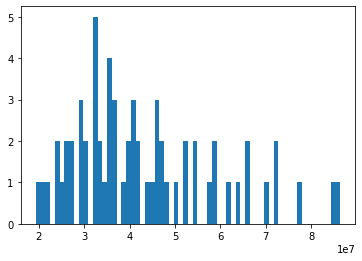

In [38]:
convo_sum_low = np.array(convoluted_img_arr_low_sum)
plt.hist(convo_sum_low, bins=64)
plt.show()